In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
import os

# Optionally force tensorflow on CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
import os
import tensorflow as tf
import keras
import numpy as np

from rule4ml.parsers.data_parser import (
    read_from_json,
    get_global_data,
    get_sequential_data,
    to_dataframe,
)

from rule4ml.parsers.data_parser import (
    default_board_map,
    default_strategy_map,
    default_layer_type_map,
)

base_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
json_data = read_from_json(
    os.path.join(base_path, "datasets", "wa-hls4ml_test_split.json"),
)

meta_data, global_inputs, targets = get_global_data(json_data)
sequential_inputs = get_sequential_data(json_data)

# Ordinal encoding of categorical inputs
global_categorical_maps = {
    "strategy": default_strategy_map,
    "board": default_board_map,
}
sequential_categorical_maps = {
    "layer_type": default_layer_type_map,
}

test_df = to_dataframe(
    meta_data=meta_data,
    global_inputs=global_inputs,
    sequential_inputs=sequential_inputs,
    global_categorical_maps=global_categorical_maps,
    sequential_categorical_maps=sequential_categorical_maps,
    targets=targets,
)

seed_num = 1337
np.random.seed(seed_num)
keras.utils.set_random_seed(seed_num)
tf.config.experimental.enable_op_determinism()

feature_labels = [
    "strategy",
    "board",
    # "precision",
    # "model_total_bits",
    # "model_integer_bits",
    # "model_fractional_bits",
    "reuse_mean",
    "weight_total_bits",
    # "weight_integer_bits",
    # "weight_fractional_bits",
    # "dense_count",
    # "batchnormalization_count",
    # "add_count",
    # "concatenate_count",
    # "dropout_count",
    # "relu_count",
    # "sigmoid_count",
    # "tanh_count",
    # "softmax_count",
    # "dense_parameters_mean",
    # "dense_inputs_mean",
    # "dense_outputs_mean",
    # "dense_reuse_mean",
    "dense_inputs_mean",
    # "dense_inputs_min",
    # "dense_inputs_min_idx",
    # "dense_inputs_max",
    # "dense_inputs_max_idx",
    "dense_outputs_mean",
    # "dense_outputs_min",
    # "dense_outputs_min_idx",
    # "dense_outputs_max",
    # "dense_outputs_max_idx",
    "dense_parameters_mean",
    # "dense_parameters_min",
    # "dense_parameters_min_idx",
    # "dense_parameters_max",
    # "dense_parameters_max_idx",
    "dense_reuse_mean",
    # "dense_reuse_min",
    # "dense_reuse_min_idx",
    # "dense_reuse_max",
    # "dense_reuse_max_idx",
    "dense_count",
    # "batchnormalization_inputs_mean",
    # "batchnormalization_inputs_min",
    # "batchnormalization_inputs_min_idx",
    # "batchnormalization_inputs_max",
    # "batchnormalization_inputs_max_idx",
    # "batchnormalization_outputs_mean",
    # "batchnormalization_outputs_min",
    # "batchnormalization_outputs_min_idx",
    # "batchnormalization_outputs_max",
    # "batchnormalization_outputs_max_idx",
    # "batchnormalization_parameters_mean",
    # "batchnormalization_parameters_min",
    # "batchnormalization_parameters_min_idx",
    # "batchnormalization_parameters_max",
    # "batchnormalization_parameters_max_idx",
    # "batchnormalization_count",
    # "add_inputs_mean",
    # "add_inputs_min",
    # "add_inputs_min_idx",
    # "add_inputs_max",
    # "add_inputs_max_idx",
    # "add_outputs_mean",
    # "add_outputs_min",
    # "add_outputs_min_idx",
    # "add_outputs_max",
    # "add_outputs_max_idx",
    # "add_count",
    # "concatenate_inputs_mean",
    # "concatenate_inputs_min",
    # "concatenate_inputs_min_idx",
    # "concatenate_inputs_max",
    # "concatenate_inputs_max_idx",
    # "concatenate_outputs_mean",
    # "concatenate_outputs_min",
    # "concatenate_outputs_min_idx",
    # "concatenate_outputs_max",
    # "concatenate_outputs_max_idx",
    # "concatenate_count",
    # "dropout_inputs_mean",
    # "dropout_inputs_min",
    # "dropout_inputs_min_idx",
    # "dropout_inputs_max",
    # "dropout_inputs_max_idx",
    # "dropout_outputs_mean",
    # "dropout_outputs_min",
    # "dropout_outputs_min_idx",
    # "dropout_outputs_max",
    # "dropout_outputs_max_idx",
    # "dropout_count",
    # "relu_inputs_mean",
    # "relu_inputs_min",
    # "relu_inputs_min_idx",
    # "relu_inputs_max",
    # "relu_inputs_max_idx",
    # "relu_outputs_mean",
    # "relu_outputs_min",
    # "relu_outputs_min_idx",
    # "relu_outputs_max",
    # "relu_outputs_max_idx",
    # "relu_count",
    # "sigmoid_inputs_mean",
    # "sigmoid_inputs_min",
    # "sigmoid_inputs_min_idx",
    # "sigmoid_inputs_max",
    # "sigmoid_inputs_max_idx",
    # "sigmoid_outputs_mean",
    # "sigmoid_outputs_min",
    # "sigmoid_outputs_min_idx",
    # "sigmoid_outputs_max",
    # "sigmoid_outputs_max_idx",
    # "sigmoid_count",
    # "tanh_inputs_mean",
    # "tanh_inputs_min",
    # "tanh_inputs_min_idx",
    # "tanh_inputs_max",
    # "tanh_inputs_max_idx",
    # "tanh_outputs_mean",
    # "tanh_outputs_min",
    # "tanh_outputs_min_idx",
    # "tanh_outputs_max",
    # "tanh_outputs_max_idx",
    # "tanh_count",
    # "softmax_inputs_mean",
    # "softmax_inputs_min",
    # "softmax_inputs_min_idx",
    # "softmax_inputs_max",
    # "softmax_inputs_max_idx",
    # "softmax_outputs_mean",
    # "softmax_outputs_min",
    # "softmax_outputs_min_idx",
    # "softmax_outputs_max",
    # "softmax_outputs_max_idx",
    # "softmax_count",
    # "total_mult",
    # "total_add",
    # "total_logical",
    # "total_lookup",
]

2024-10-06 09:37:56.933830: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 09:37:56.933858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 09:37:56.934795: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 09:37:56.939286: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-06 09:37:57.512283: W tensorflow/compiler/tf2

In [4]:
from rule4ml.models.estimators import ModelWrapper
from rule4ml.parsers.data_parser import boards_data, default_board_map

test_inputs_df = test_df[feature_labels].copy()
print(f"Test Inputs: {test_inputs_df.shape}")

prediction_labels = ["bram", "dsp", "ff", "lut", "cycles"]
test_targets_df = test_df[prediction_labels].copy()

wrappers = []
abs_errors = []
relative_percentage_errors = []
sape_errors = []
normed_errors = []
for label in prediction_labels:
    wrapper = ModelWrapper()
    # wrapper.load(
    #     f"./models/best_{label.upper()}_MLP_config.json",
    #     f"./models/best_{label.upper()}_MLP.weights.h5",
    # )
    wrapper.load(
        f"./models/vsynth/{label.upper()}_MLP_config.json",
        f"./models/vsynth/{label.upper()}_MLP.weights.h5",
    )
    wrappers.append(wrapper)

    pred = wrapper.predict_from_df(test_inputs_df).squeeze()
    gn = test_targets_df[label].values

    abs_errors.append(np.abs(gn - pred))
    sape_errors.append(2 * np.abs(gn - pred) / (np.abs(gn) + np.abs(pred) + 1e-6))

    board_name = ""
    for board, board_id in default_board_map.items():
        if board_id == test_inputs_df["board"].values[0]:
            board_name = board
            break

    if label != "cycles":
        max_vals = boards_data[board_name][f"max_{label}"]
        normed_gn = np.maximum(1 / max_vals, np.minimum(gn / max_vals, 2.0)) * 100
        normed_pred = np.maximum(1 / max_vals, np.minimum(pred / max_vals, 2.0)) * 100
        normed_errors.append(np.abs(normed_gn - normed_pred))
    else:
        normed_errors.append(np.abs(gn - pred))

    relative_percentage_errors.append((gn - pred) / (gn + 1))

Test Inputs: (22579, 9)


2024-10-06 09:38:15.050527: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-10-06 09:38:15.050546: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: 3it-ia-s001.3it.usherbrooke.ca
2024-10-06 09:38:15.050551: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: 3it-ia-s001.3it.usherbrooke.ca
2024-10-06 09:38:15.050593: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 550.90.7
2024-10-06 09:38:15.050607: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 550.90.7
2024-10-06 09:38:15.050611: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 550.90.7


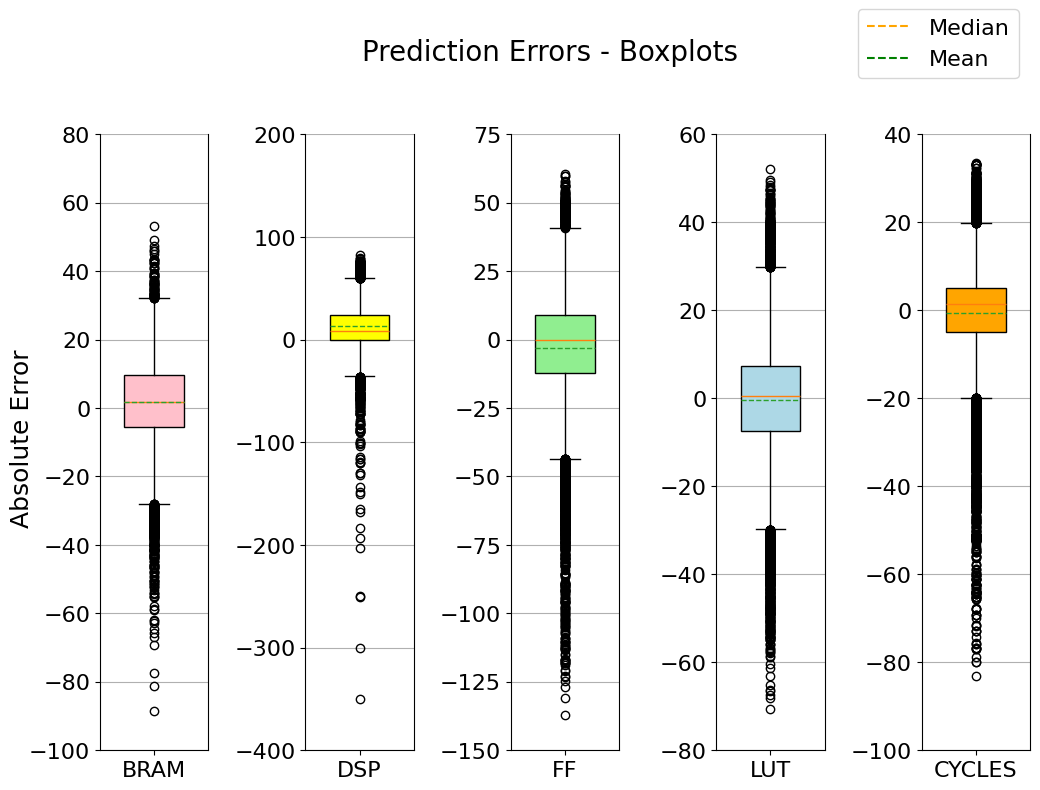

In [9]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size": 16})

fig, axis = plt.subplots(1, len(relative_percentage_errors), figsize=(12, 8))
axis = np.reshape(axis, -1)
fig.subplots_adjust(hspace=0.1, wspace=0.9)

iqr_weight = 1.5
colors = ["pink", "yellow", "lightgreen", "lightblue", "#FFA500"]

for i, errors in enumerate(relative_percentage_errors):
    label = prediction_labels[i]
    ax = axis[i]

    bplot = ax.boxplot(
        errors * 100,
        whis=iqr_weight,
        tick_labels=[label.upper()],
        showfliers=True,
        showmeans=True,
        meanline=True,
        vert=True,
        patch_artist=True,
        widths=0.55,
    )

    for j, patch in enumerate(bplot["boxes"]):
        patch.set_facecolor(colors[(i + j) % len(colors)])

    ax.yaxis.grid(True)
    ax.spines.top.set_visible(False)
    ax.xaxis.tick_bottom()
    # ax.set_ylim(bottom=-0.5)

    if label in ["dsp", "ff", "lut", "cycles"]:
        original_ticks = ax.get_yticks()
        ax.set_yticks(original_ticks)

        # ax.set_yticklabels([f'{int(tick / 1000)}' for tick in original_ticks])
        # ax.set_ylim(bottom=0)
        # ax.text(0.5, 1.05, r"$\times 10^3$", transform=ax.transAxes,
        # fontsize=14, va='center', ha='center')

    elif label == "bram":
        original_ticks = ax.get_yticks()
        ax.set_yticks(original_ticks)

        # ax.set_yticklabels([f'{int(tick)}' for tick in original_ticks])
        # ax.set_ylim(bottom=0)

median_line = Line2D([0], [0], color="orange", linestyle="--", linewidth=1.5, label="Median")
mean_line = Line2D([0], [0], color="green", linestyle="--", linewidth=1.5, label="Mean")

handles = [median_line, mean_line]
labels = ["Median", "Mean"]

legends = fig.legend(
    handles,
    labels,
    bbox_to_anchor=[0.9, 1.05],
    loc="upper right",
    ncol=len(labels) // 2,
)

ytext = fig.text(0.05, 0.5, "Absolute Error", va="center", rotation="vertical", size=18)
suptitle = fig.suptitle("Prediction Errors - Boxplots", fontsize=20, y=1)

# Save the figure
fig.savefig(
    "./box_plot_benchmark.png",
    dpi=300,
    bbox_extra_artists=(legends, ytext, suptitle),
    bbox_inches="tight",
)

plt.show()